<a href="https://colab.research.google.com/github/brenoslivio/SME0828_DataScience/blob/master/Projects/3%20-%20Classifica%C3%A7%C3%A3o/Projeto3_Classificacao_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SME0828 - Introdução à Ciência de Dados
# Projeto 3: Classificação 

### Alunos

Aline Fernanda da Conceição, Nº USP: 9437275

Breno Lívio Silva de Almeida, Nº USP: 10276675

Matheus Victal Cerqueira, Nº USP: 10276661

***Universidade de São Paulo, São Carlos, Brasil.***

## Exercícios sugeridos para a atividade avaliativa 3

Os seguintes exercícios foram sugeridos para entrega em 03 de novembro de 2020 para a disciplina SME0828 - Ciência de Dados oferecida pelo Instituto de Ciências Matemáticas e de Computação (ICMC) da Universidade de São Paulo (USP), a qual foi ministrada pelo professor Francisco Aparecido Rodrigues. Vamos trabalhar com o conjunto de dados [*Star dataset to predict star types*](https://www.kaggle.com/deepu1109/star-dataset). O dataset tem várias informações sobre características de estrelas como temperatura absoluta, luminosidade relativa, tipos de estrelas, entre outros. Vamos classificar os dados considerando vários classificadores conhecidos.



---



## Sumário

1. Desenvolvimento

  1.1 [Exercício 1](#ex1)

  1.2 [Exercício 2](#ex2)

  1.3 [Exercício 3](#ex3)

  1.4 [Exercício 4](#ex4)

  1.5 [Exercício 5](#ex5)

  1.6 [Exercício 6](#ex6)
  
  1.7 [Exercício 7](#ex7)



---



## Desenvolvimento

### <a name="ex5"></a> 5 - Gere dois conjuntos de pontos em duas dimensões usando o código a seguir:

```
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
n = 500
c = [(1,1), (10,10)] #center of the points
std = [5.0, 2] # standard deviation
nc = [400,50] #number of points in each class
X, y = make_blobs(n_samples=n, n_features=2, cluster_std=std,centers= c)
plt.scatter(X[:,0],X[:,1], c=y)
plt.show(True)
```
### Compare os classificadores Naive Bayes e Bayesiano Paramétrico variando a separação entre as nuvens de pontos – mantenha a posição de uma classe fixa e mude a posição do centro da outra classe, calculando a distância entre os centros.


Para desenvolvimento do exercício, primeiramente importamos as bibliotecas necessárias para gerar os dados que serão utilizados na análise:

In [80]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import multivariate_normal

Vamos usar o método make_blobs que faz parte da biblioteca sklearn.datasets.samples_generator. O método é utilizado para gerar "bolhas" Gaussianas isotrópicas para agrupamentos. Essas bolhas podem estar localizadas em locais diferentes e a intenção desse exercício é fazer os agrupamentos de acordo com a posição do centro dessa bolha. 

Para esse exercício, realizamos e exibimos a mudança da posição do centro da bolha e foi plotado 5 dessas mudanças para ser em seguida calculada a acurácia e a distância desses pontos em cada um dos casos. 

Para isso, será utilizado os classificadores Naive Bayes e o Bayesiano Paramétrico a fim de obter a acurácia de cada um deles. 

### Naive Bayes

O classificador Naive-Bayes, assim como mencionado em exercícios anteriores, também está implementado na biblioteca sklearn e para que isso seja realizado, utilizaremos a função GaussianNB. 
A principal diferença aqui utilizada é a condição de que os atributos de cada observação dão independentes.

In [81]:
def naive_bayes(x_train, x_test, y_train, y_test):
    from sklearn.naive_bayes import GaussianNB
    from sklearn import metrics

    model = GaussianNB()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    score = accuracy_score(y_pred, y_test)
    
    return score

Abaixo geramos e preparamos os dados através da make_blobs realizando a variação dos pontos centrais de cada uma das bolhas e calculando a distância entre esses pontos centrais. Para melhor visualização das bolhas e dessas distâncias, inserimos os gráficos com 5 variações dos pontos centrais. O cálculo da distância entre cada uma delas assim como a acurácia pode ser observada no canto inferior direito dos gráficos. 

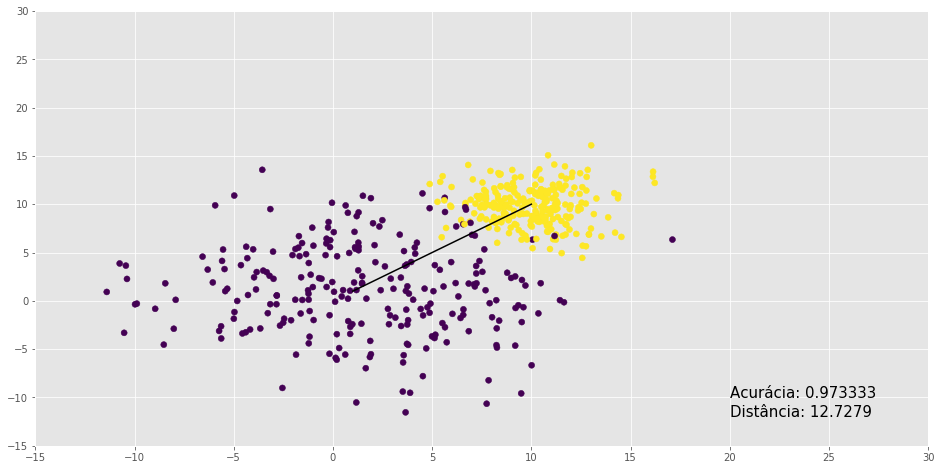

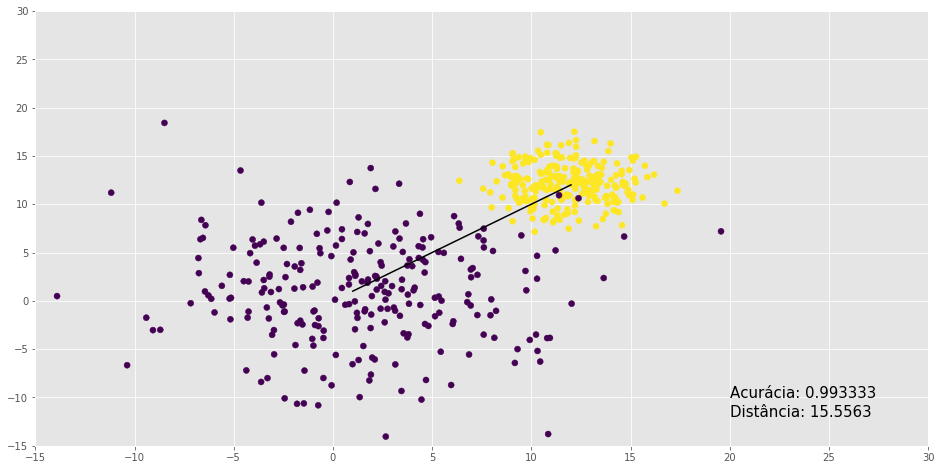

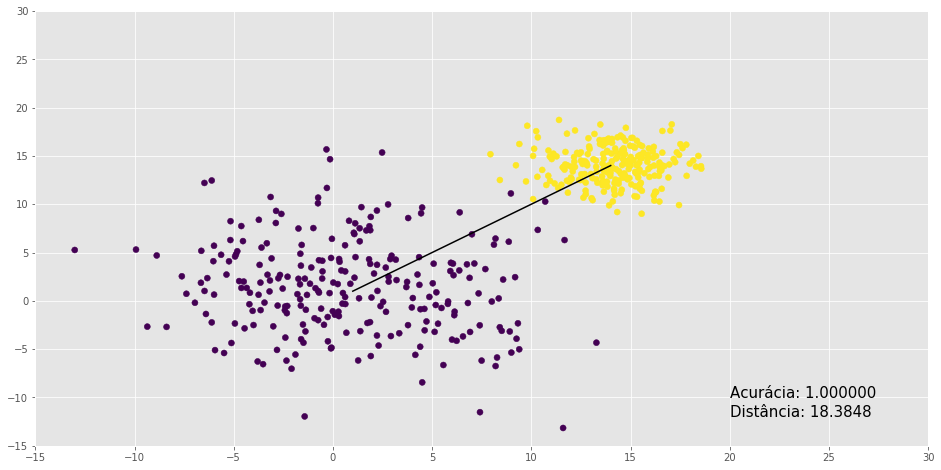

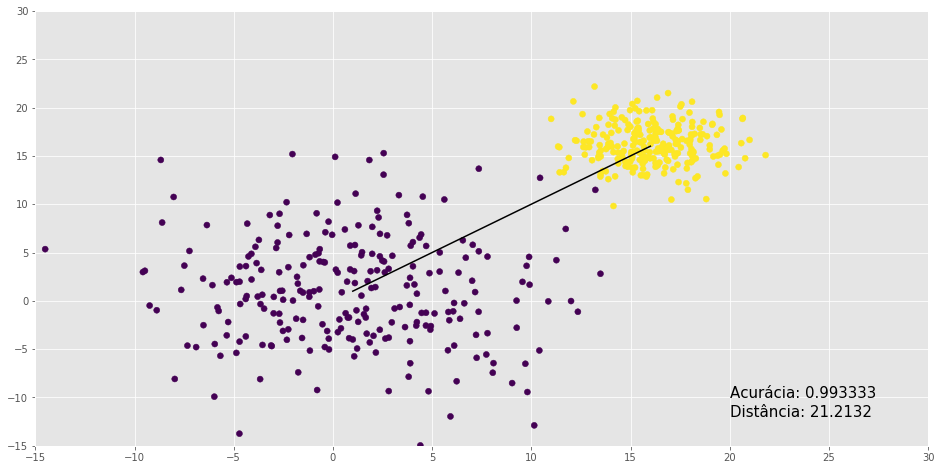

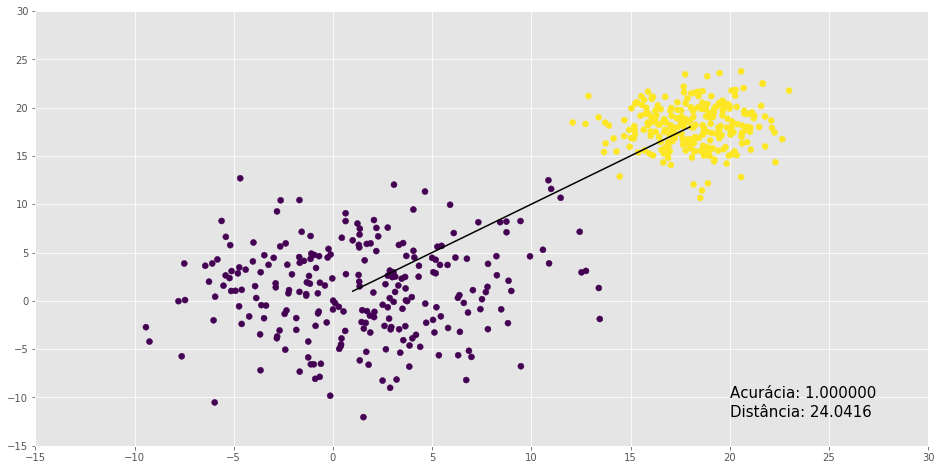

In [82]:
for i in np.arange(start = 0, stop = 10, step = 2):
    plt.figure(figsize=(16,8))
    n = 500
    c = [(1,1), (10+i,10+i)] #centro dos pontos
    std = [5.0, 2] # desvio padrão
    nc = [400,50] #número de pontos em cada classe
    X, y = make_blobs(n_samples = n, n_features = 2, cluster_std = std, centers = c)
    scaler = StandardScaler().fit(X) #padronizar os dados
    X_norm = scaler.transform(X)
    p = 0.7

    plt.plot([c[0][0], 10 + i], [c[0][1], 10 + i],'k-')

    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size = p, random_state = 25) 
    #Seleciona os conjuntos de treinamento e teste

    stringScore = 'Acurácia: {0:.6f}'.format(naive_bayes(X_train, X_test, y_train, y_test))
    plt.text(20, -10, stringScore, fontsize=15)

    stringScore = 'Distância: {0:.4f}'.format(np.linalg.norm(np.array(c[1]) - np.array(c[0])))
    plt.text(20, -12, stringScore, fontsize=15)

    plt.xlim(-15, 30)
    plt.ylim(-15, 30)

    plt.scatter(X[:,0], X[:,1], c = y)
    plt.show(True)

#### Bayesiano Paramétrico

Como descrito também em exercícios anteriores. O classificador Bayesiano Paramétrico utiliza propriedades do Teorema de Bayes com o objetivo de determinar qual classe tem a maior probabilidade de ser a classe analisada utilizando um método de máxima verossimilhança. 
Assim, a função abaixo possui os parâmetros probabilisticos de pertencimento de classes para retornar a acurácia a partir dos conjuntos de treinamento e de teste que vai receber.

In [83]:
def bayes_parametrico(x_train, x_test, y_train, y_test, classes):
    # Declaração para a matriz que irá armazenar as probabilidades para cada classe

    P = pd.DataFrame(data=np.zeros((x_train.shape[0], len(classes))), columns = classes) 

    # (Repare que tal matriz apresenta o mesmo número de linhas que x_train e o número de classes como número de 
    # colunas, assim poderá armazenar a probabilidade de cada ponto observado pertencer a classe 0 ou 1)

    Pc = np.zeros(len(classes)) # Armazenamento da fração de elementos em cada classe (no caso, é um vetor 1x2)

    for i in np.arange(0, len(classes)): # Iteração no número de classes
        elem = tuple(np.where(y_trfor i in np.arange(start = 0, stop = 10, step = 2):ain == classes[i])) # Obtenção de tupla correspondente à freq de elem da classe i
        Pc[i] = len(elem)/len(y_train) # Probabilidade de pertencer a classe i (no caso, 0 ou 1)
        Z = x_train[elem,:][0] # Elementos presentes no conjunto de treinamento
        m = np.mean(Z, axis = 0) # Vetor de médias
        cv = np.cov(np.transpose(Z)) # Matriz de variâncias e covariâncias
        for j in np.arange(0,x_test.shape[0]): # Iteração para as observações no conjunto de teste
            x = x_test[j,:]
            # Obtenção da probabilidade de pertencer a cada classe (conjunto teste)
            pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True) # Modelagem em uma distribuição
            # normal multivariada (Classificador Bayesiano Paramétrico)
            P[classes[i]][j] = pj*Pc[i] # posteriori proporcional a verossimilhança x priori (Teorema de Bayes)

    y_pred = [] # Declaração do vetor que irá armazenar as classes preditas 
    for i in np.arange(0, x_test.shape[0]): # Iteração em len(número de colunas de x_test)
        c = np.argmax(np.array(P.iloc[[i]])) # Identificador (encontra a probabilidade a posteriori com maior valor)
        y_pred.append(classes[c]) # Classificador (classifica os dados de x_test)

    # Obtenção da acurácia
    score = accuracy_score(y_pred, y_test) #Obtém a acurácia do classificador 
    
    return score

SyntaxError: invalid syntax (<ipython-input-83-0f13aeb44a9b>, line 12)

Como em naive bayes, aqui temos a função que irá gerar e preparar os dados da mesma forma utilizando o make_blobs e tendo como resultado as distâncias e acurácia. Temos aqui também a visualização a partir de 5 gráficos com diferentes variações centrais com os respectivos resultados de distância e acurácia no canto inferior direito. 

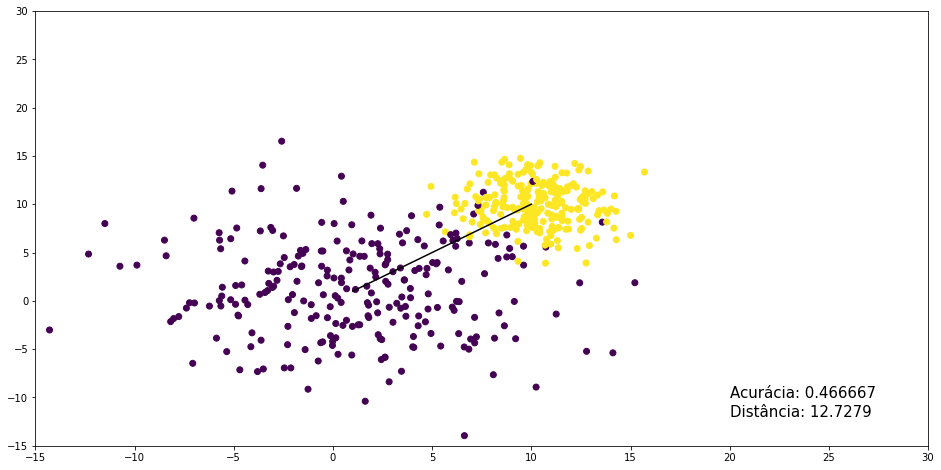

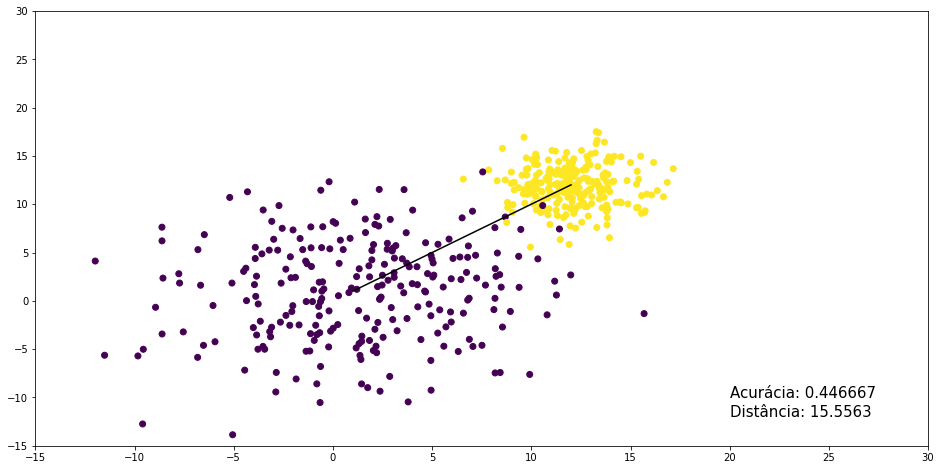

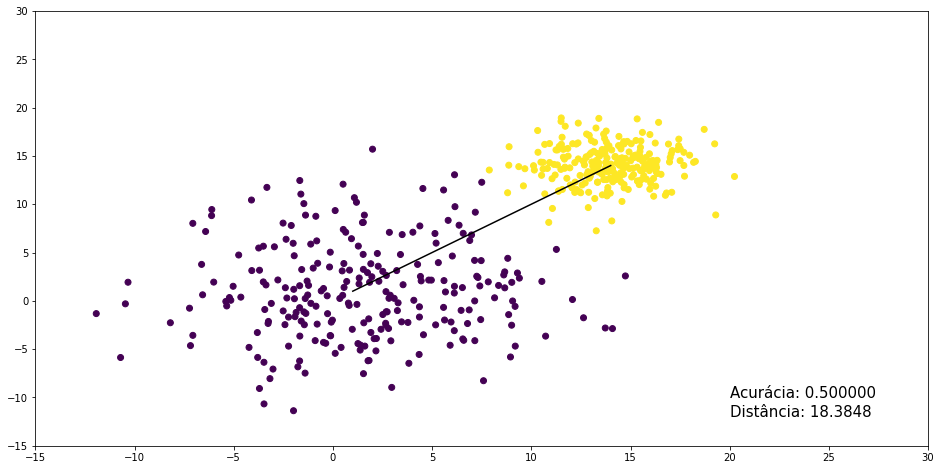

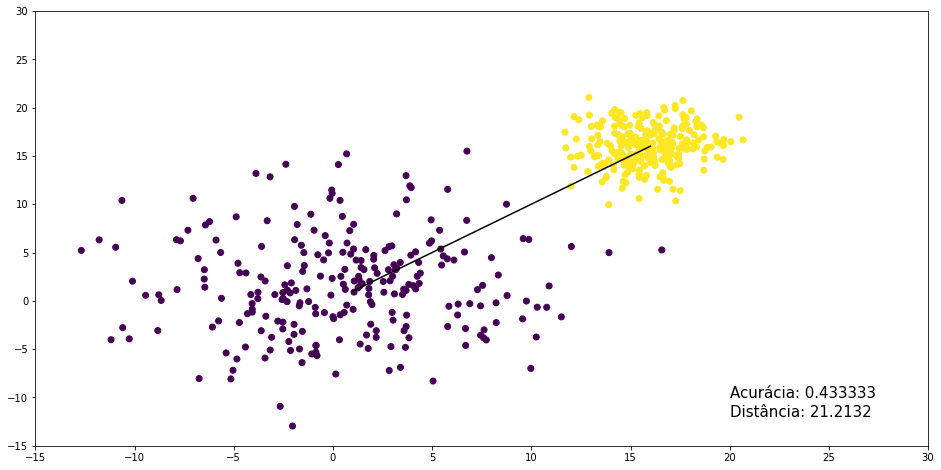

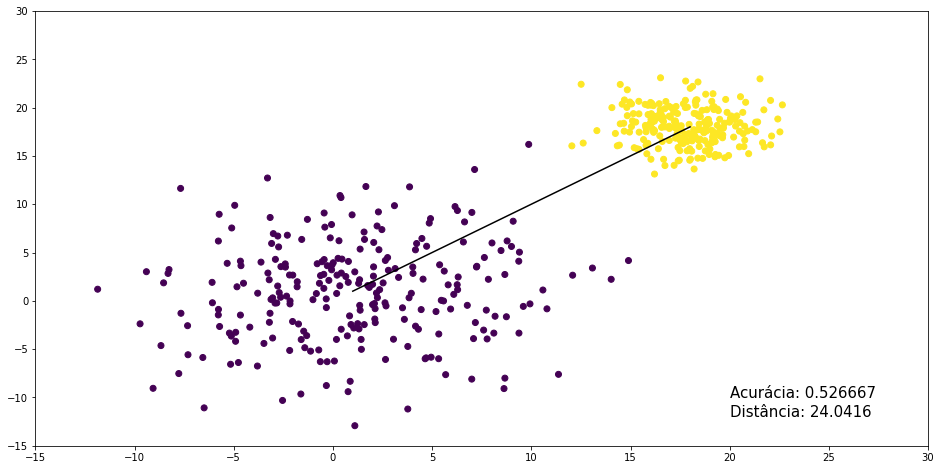

In [100]:
for i in np.arange(start = 0, stop = 10, step = 2):
    plt.figure(figsize=(16,8))
    n = 500
    c = [(1,1), (10+i,10+i)] #centro dos pontos
    std = [5.0, 2] # desvio padrão
    nc = [400,50] #número de pontos em cada classe
    X, y = make_blobs(n_samples = n, n_features = 2, cluster_std = std, centers = c)
    scaler = StandardScaler().fit(X) #padronizar os dados
    X_norm = scaler.transform(X)
    p = 0.7

    plt.plot([c[0][0], 10 + i], [c[0][1], 10 + i],'k-')

    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size = p, random_state = 25) #Seleciona os conjuntos de treinamento e teste

    stringScore = 'Acurácia: {0:.6f}'.format(bayes_parametrico(X_train, X_test, y_train, y_test, y))
    plt.text(20, -10, stringScore, fontsize=15)

    stringScore = 'Distância: {0:.4f}'.format(np.linalg.norm(np.array(c[1]) - np.array(c[0])))
    plt.text(20, -12, stringScore, fontsize=15)

    plt.xlim(-15, 30)
    plt.ylim(-15, 30)

    plt.scatter(X[:,0], X[:,1], c = y)
    plt.show(True)

Quando comparamos os resultados dos dois modelos, conseguimos identificar o Naive como melhor classificador dado que a acurácia do mesmo obteve valores bem mais altos do que quando comparamos com o Bayesiano Paramétrico. Sendo a de Naive com resultados próximos a 1 enquanto B.P. com resultados que variaram na média de 0,5.

### <a name="ex6"></a> 6 - Gere dois conjuntos de pontos em duas dimensões usando o código a seguir:

```
from sklearn import datasets
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
n_samples = 1000
data  = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap=’viridis’, s=50, alpha=0.7)
plt.show(True)
```
### Compare os classificadores Naive Bayes, k-vizinhos mais próximos e regressão logística variando o nível de ruído (noise) no intervalo [0,1]. No caso do algoritmo k-vizinho, mostre os resultados para diferentes valores de k.


Primeiramente, importamos todas as bibliotecas necessárias para a gerar, preparar e realizar as acurácias para posteriormente serem analisados e comparados todos os modelos:

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

Assim como no exercício 3, os dados utilizados foram gerados pelo método make_moons a partir da biblioteca sklearn.
Utilizando o código sugerido inicialmente como base temos: 

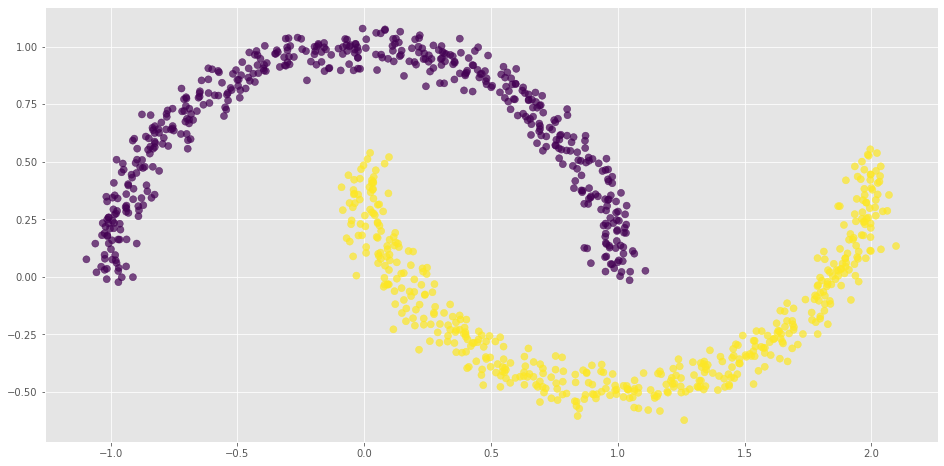

In [85]:
plt.figure(figsize=(16,8))
n_samples = 1000
data  = datasets.make_moons(n_samples=n_samples, noise=0.05)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

Para esse exercício como vamos variando o rúido dentro do intervalo [0,1], faremos um função de classificação para cada um deles e depois comparar via tabela e gráfico no final

### Naive Bayes

O classificador Naive-Bayes, assim como mencionado em exercícios anteriores, também está implementado na biblioteca sklearn e para que isso seja realizado, utilizaremos a função GaussianNB. 

Para realizar o treino e o teste no conjunto de dados, o ajuste partiu do ponto onde o ruído varia dentro do intervalo estabelecido com uma semente para a seleção aleatória dos dados nos conjuntos. 

In [86]:
#gerar os dados
n_samples = 1000
noise = np.arange(0,1,0.01)
score1 = [] 
#preparar os dados
for i in noise:
    np.random.seed(50)
    data = datasets.make_moons(n_samples=n_samples, noise=i)
    X = data[0]
    y = data[1]
    scaler = StandardScaler().fit(X) #padronizar os dados
    X = scaler.transform(X)
    p = 0.7 
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 25) #Seleciona os conjuntos de treinamento e teste
    model = GaussianNB() #Ajusta o classificador Naive-Bayes de acordo com os dados
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) # Predicao
    score1.append(accuracy_score(y_pred, y_test)) #Calcula a acuracia

## K- vizinhos

O modelo de k-vizinhos tem como ideia principal determinar o rótulo de classificação com base nas amostras vizinhas do conjunto de treinamento. Para isso, vamos utilizar a função KNeighborsClassifier com ajuste de quantos vizinhos mais proximos serão comparados e com a heusrística que vamos utilizar. 
No caso desse modelo, utilizamos a distância euclidiana como heurística visto que é uma das mais comuns [Serpa, 2011](https://www.lac.inpe.br/~lorena/dalila/diss-dalila.pdf). 


In [87]:
#gerando os dados
n_samples = 1000
noise = np.arange(0,1,0.01)
score2 = []
for i in noise:
    np.random.seed(50)
    data = datasets.make_moons(n_samples=n_samples, noise=i)
    X = data[0]
    y = data[1]
    scaler = StandardScaler().fit(X) #normalizando os dados
    X = scaler.transform(X)
    p = 0.7
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 25)
    model = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')# ajusta o modelo k-vizinhos
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)  # faz a predição no conjunto de teste
    score2.append(accuracy_score(y_pred, y_test)) # verifica a acurácia da predicao

## Regressão Logística

O modelo de regressão Logística é mais simples e mais flexível em suas suposições. Não há suposição de que as variáveis independentes estejam distribuídas segunda distribuição normal, sejam linearmente relacionadas, ou que possuam variância igual dentro de cada grupo. 

Como nos modelos anteriores, a Regressão Logística está na biblioteca sklearn e foi utilizada a função LogisticRegression. 

In [88]:
n_samples = 1000
score3 = []
noise = np.arange(0,1,0.01)

In [89]:
for i in noise:
    np.random.seed(50)
    data = datasets.make_moons(n_samples=n_samples, noise=i)
    X = data[0]
    y = data[1]
    classes = np.array(pd.unique(y), dtype=int) 
    p = 0.7
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 50)

    model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score3.append(model.score(x_test, y_test))

In [90]:
print("Classificador | Acurácia\t\tMínima\t\tMáxima\t\tMédia")
print("_______________________________________________________________________________")
print("Naive Bayes:\t\t\t\t" ,round(np.min(score1),3), "\t\t", round(np.max(score1),3),"\t\t", round(np.mean(score1),3)  )
print("K-vizinhos:\t\t\t\t", np.min(score2), "\t\t", np.max(score2),"\t\t", round(np.mean(score2),3))
print("Regressão Logística:\t\t\t",round(np.min(score3),3),"\t\t",round(np.max(score3),3),"\t\t", round(np.mean(score2),3))
print("_______________________________________________________________________________")

Classificador | Acurácia		Mínima		Máxima		Média
_______________________________________________________________________________
Naive Bayes:				 0.703 		 0.873 		 0.792
K-vizinhos:				 0.59 		 1.0 		 0.776
Regressão Logística:			 0.7 		 0.887 		 0.776
_______________________________________________________________________________


Após análise dos resultados obtidos, notamos que para todos os classificadores a acurácia foi alta, com média entre 77% e 79%, sendo a máxima 87% a 100%. 
Os classsificadores de Naive Bayes e a Regressão Logística apresentaram resultados bem semelhantes enquanto K-vizinhos houve um intervalo maior em relação ao mínimo e máximo obtido para a acurácia.

A seguir vamos analisar de forma gráfica os três classificadores:

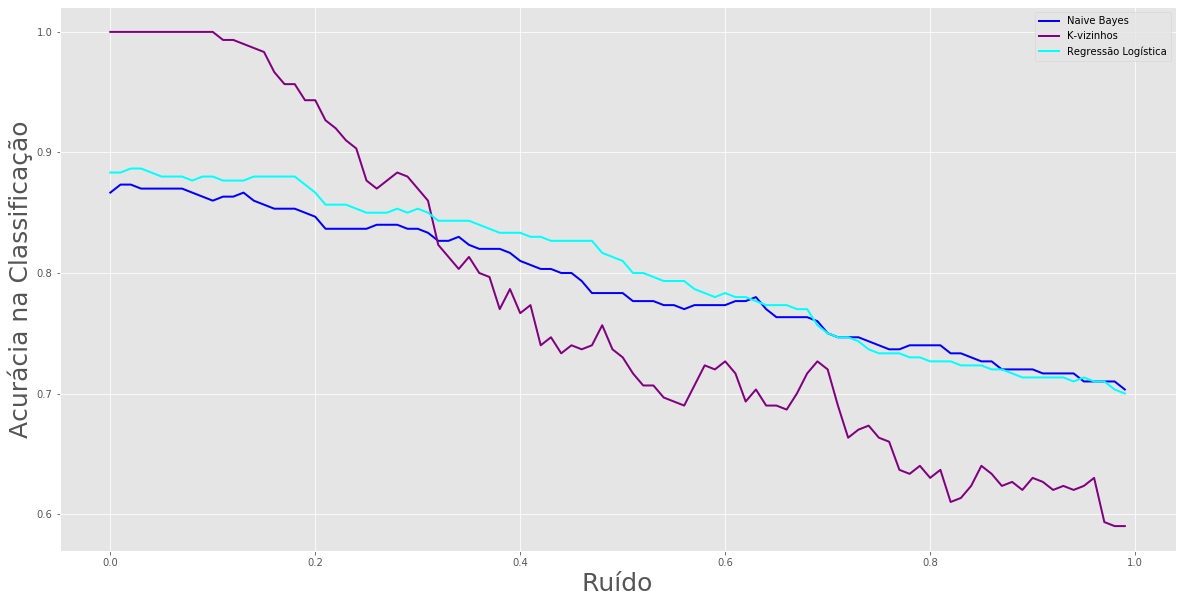

In [91]:
plt.style.use('ggplot')

plt.figure(figsize=(20,10))
plt.plot(noise, score1, linestyle='-', color="blue", linewidth=2,label = 'Naive Bayes')
plt.plot(noise, score2, linestyle='-', color="purple", linewidth=2,label = 'K-vizinhos')
plt.plot(noise, score3, linestyle='-', color="cyan", linewidth=2,label = 'Regressão Logística')
plt.ylabel("Acurácia na Classificação", fontsize=25)
plt.xlabel("Ruído", fontsize=25)
plt.legend()
plt.show(True)

A partir do gráfico conseguimos ter uma melhor noção em relação aos valores da acurácia quando comparamos com a variação do ruído em torno do intervalo [0,1]. 

Os classificadores de Naive Bayes e a Regressão Logística tiveram o compartamento mais semelhante enquanto o k-vizinhos bem diferente com uma variação bem maior. Apesar de terem a acurácia média parecida, os modelos de Naive Bayes e a Regressão Logística variaram bem menos, portanto a possibilidade da precisão deles serem melhor é maior. 

Entretanto, para uma melhor avaliação e definir o melhor modelo, uma análise estatística mais detalhada em relação a qual classificador utilizar seria interessante, além de outras questões como independência das observações e nível de significância que seria utilizado.

### <a name="ex7"></a> 7 - Considerando os dados do código anterior, compare os algoritmos: árvores de decisão, forestas aleatórias e bagging. Use o método selection.GridSearchCV da biblioteca sciki-learn para determinar os melhores parâmetros dos modelos.


Primeiramente, importamos todas as bibliotecas necessárias para a gerar, preparar e realizar as acurácias para posteriormente serem analisados e comparados todos os modelos:

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

A partir do código citado abaixo, faremos as análises comparando os modelos de árvores de decisão, forestas aleatórias e bagging.

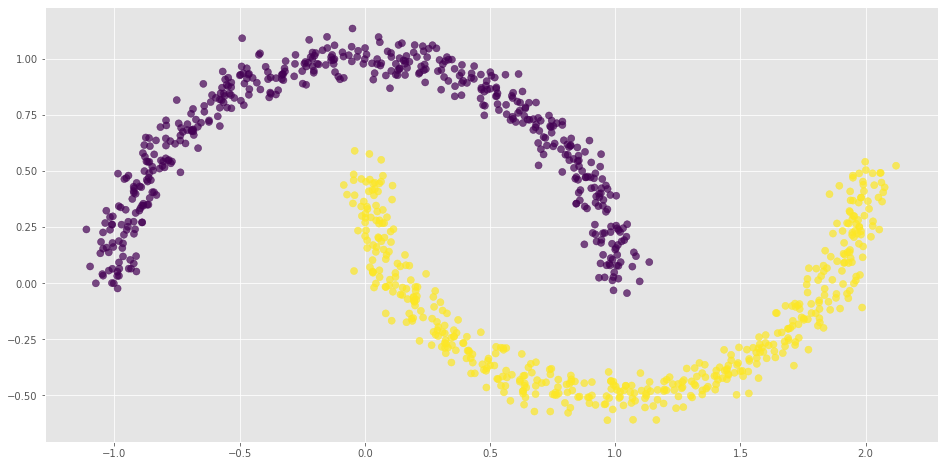

In [102]:
plt.figure(figsize=(16,8))
n_samples = 1000
data  = datasets.make_moons(n_samples=n_samples, noise=0.05)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

## Árvore de Decisão

Uma árvore de decisão é uma representação de uma tabela de decisão sob a forma de árvore. Para a sua aplicação, vamos a partir da biblioteca sklearn, utilizar a função DecisionTreeClassifier para gerar, ajustar, treinar e prever o modelo.

In [103]:
from sklearn import tree

#gerar os dados
n_samples = 1000
noise = np.arange(0,1,0.01)
score1 = [] 
ex = DecisionTreeClassifier()

for i in noise:
    np.random.seed(50)
    data = datasets.make_moons(n_samples=n_samples, noise=i)
    X = data[0]
    y = data[1]
    scaler = StandardScaler().fit(X) #padronizar os dados
    X = scaler.transform(X)
    p = 0.7 
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 25)
    X_train.shape,X_test.shape # Verificando as formas dos dados
    model = DecisionTreeClassifier() #ajusta o modelo de arvore de decisão
    model.fit(X_train,y_train) # Treinando o modelo de arvore de decisão
    ex = model

    y_pred = model.predict(X_test)
    score1.append(model.score(X_test, y_test))

A seguir é possível obter uma visualização de como foi realizada a árvore

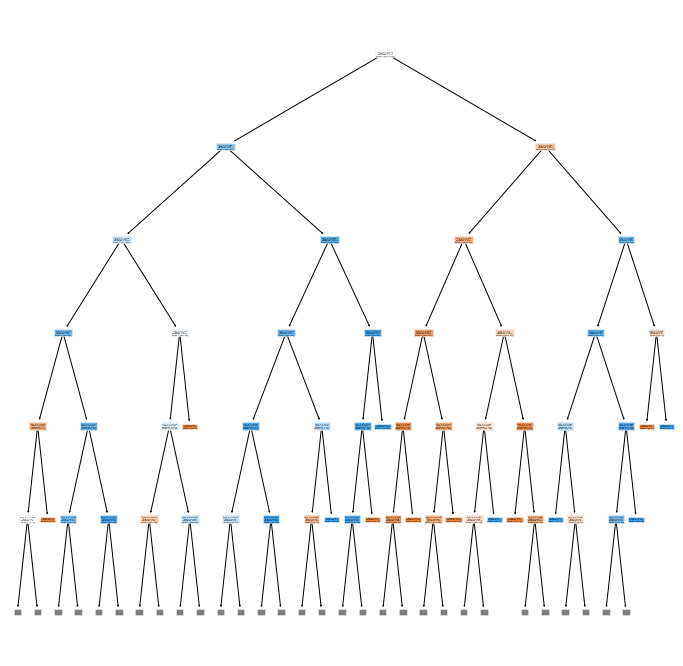

In [96]:
plt.figure(figsize=(12, 12))
out = tree.plot_tree(model, max_depth = 5, filled = True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

## Floresta Aletória

Uma Floresta Aleatória é a combinação de árvore de decisão utilizando o método de bagging para criar a "floresta". Para a sua aplicação, vamos a partir da biblioteca sklearn, utilizar a função RandomForestClassifier para gerar, ajustar, treinar e prever o modelo.

In [104]:
#gerar os dados
n_samples = 1000
noise = np.arange(0,1,0.01)
score2 = [] 
for i in noise:
    np.random.seed(50)
    data = datasets.make_moons(n_samples=n_samples, noise=i)
    X = data[0]
    y = data[1]
    scaler = StandardScaler().fit(X) #padronizar os dados
    X = scaler.transform(X)
    p = 0.7 
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 25)
    X_train.shape,X_test.shape # Verificando as formas dos dados
    model = RandomForestClassifier() #ajusta o modelo de arvore de decisão
    model.fit(X_train,y_train) # Treinando o modelo de arvore de decisão
    y_pred = model.predict(X_test)
    score2.append(model.score(X_test, y_test))

## Bagging

O classificador de bagging gera um conjunto de dados por amostragem bootstrap dos dados originais. Para a sua aplicação, vamos a partir da biblioteca sklearn, utilizar a função BaggingClassifier para gerar, ajustar, treinar e prever o modelo.

In [105]:
#gerar os dados
n_samples = 1000
noise = np.arange(0,1,0.01)
score3 = []
for i in noise:
    np.random.seed(50)
    data = datasets.make_moons(n_samples=n_samples, noise=i)
    X = data[0]
    y = data[1]
    scaler = StandardScaler().fit(X) #padronizar os dados
    X = scaler.transform(X)
    p = 0.7 
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 25)
    X_train.shape,X_test.shape # Verificando as formas dos dados
    model = BaggingClassifier() #ajusta o modelo bagging
    model.fit(X_train,y_train) # Treinando o modelo bagging
    y_pred = model.predict(X_test)
    score3.append(model.score(X_test, y_test))

In [106]:
print("Classificador | Acurácia\tMínima\t\tMáxima\t\tMédia")
print("________________________________________________________________________________")
print("Árvore de Decisão:\t\t" ,round(np.min(score1),3), "\t\t", round(np.max(score1),3),"\t\t", round(np.mean(score1),3)  )
print("Floresta Aletória:\t\t", round(np.min(score2),3), "\t\t", np.max(score2),"\t\t", round(np.mean(score2),3))
print("Bagging:\t\t\t",round(np.min(score3),3),"\t\t",round(np.max(score3),3),"\t\t", round(np.mean(score2),3))
print("_______________________________________________________________________________")

Classificador | Acurácia	Mínima		Máxima		Média
________________________________________________________________________________
Árvore de Decisão:		 0.587 		 1.0 		 0.772
Floresta Aletória:		 0.613 		 1.0 		 0.807
Bagging:			 0.623 		 1.0 		 0.807
_______________________________________________________________________________


Após análise dos resultados obtidos, notamos que para todos os classificadores a acurácia foi alta. Sendo a média entre 77% e 80%, máxima de 100% e a mínima entre 58% e 62%.

Todos os três classsificadores apresentaram resultados bem semelhantes, o que faz sentido visto que a floresta aleatória utiliza uma infinidade de árvores de decisão no momento do treinamento e gera a classe que é a predição média das árvores individuais além de conter método de Bagging em seu algoritmo . 

A seguir vamos analisar de forma gráfica os três classificadores:

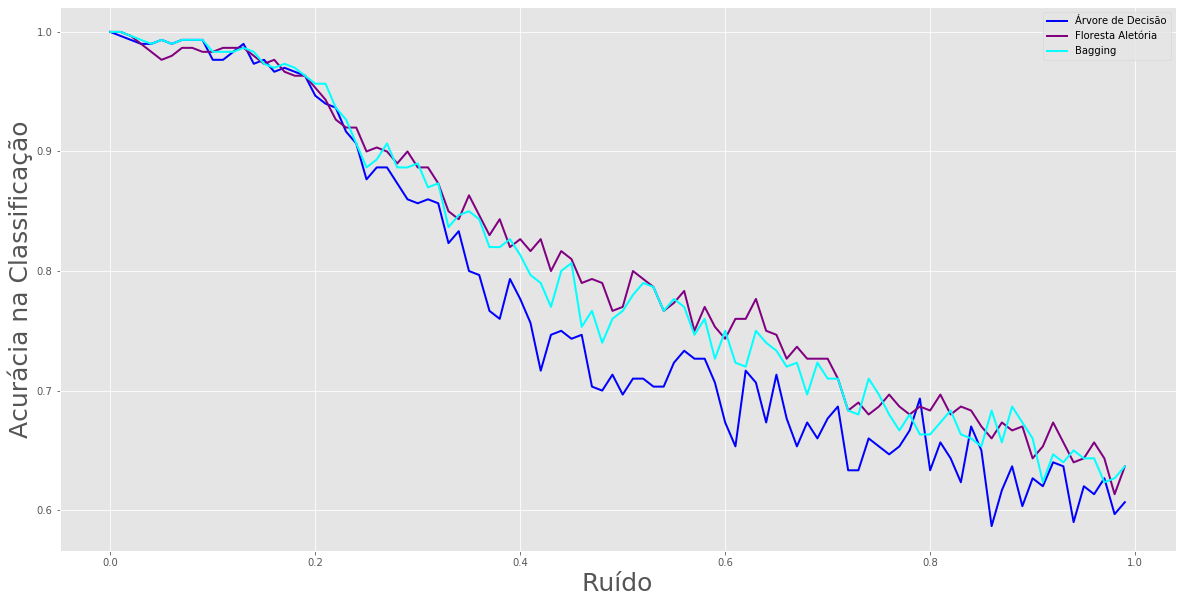

In [107]:
plt.style.use('ggplot')

plt.figure(figsize=(20,10))
plt.plot(noise, score1, linestyle='-', color="blue", linewidth=2,label = 'Árvore de Decisão')
plt.plot(noise, score2, linestyle='-', color="purple", linewidth=2,label = 'Floresta Aletória')
plt.plot(noise, score3, linestyle='-', color="cyan", linewidth=2,label = 'Bagging')
plt.ylabel("Acurácia na Classificação", fontsize=25)
plt.xlabel("Ruído", fontsize=25)
plt.legend()
plt.show(True)

A partir do gráfico conseguimos ter uma melhor noção em relação aos valores da acurácia contra a variação do ruído em torno do intervalo [0,1]. 

Diferente do exercício anterior, os três classificadores obtiveram comportamentos mais parecidos como mencionado na análise da tabela de acurácia. Porém o de Árvore de Decisão possui mais variação ao longo do intervalo. Já Bagging segue mais o comportamento da Floresta Aletória, sendo esse último ainda com menor variação. 

Como mencionado acima, Floresta Aletória utiliza de os outros dois na sua classificação podendo superar de fato os seus resultados. Entretanto é preciso estar atento às características dos dados pois essas podem afetar o desempenho. 

Quaisquer um dos três classificadores podem ser utilizados por ter resultados bem semelhantes, entretanto, como mencionado anteriormente, para realizar uma avaliação ainda melhor, outros fatores poderiam ser incluídos na nossa análise a fim buscar o melhor classificador entre os três.